<a href="https://colab.research.google.com/github/arthurziegler/pytorch-deep-learning-course/blob/main/Notebooks/PyTorch_Linear_Classification_(With_Logits).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BCE Loss with Logits

Why? Numerical instability. Exponentiating things leads to very large numbers (larger than a computer can represent).
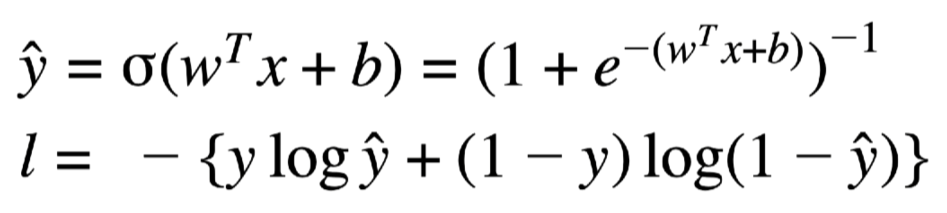

We want to change this calculation to avoid this instability. There is a way to do sigmoid and binary loss to avoid this.

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [4]:
# load the data
data = load_breast_cancer()

In [5]:
# check the type of 'data'
type(data)

sklearn.utils.Bunch

In [6]:
# note: it is a Bunch object
# this basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
# 'data' (the attribute) means the input data
data.data.shape
# it has 569 samples, 30 features

(569, 30)

In [8]:
# 'targets'
data.target
# note how the targets are just 0s and 1s
# normally, when you have K targets, they are labeled 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
# there are also 569 corresponding targets
data.target.shape

(569,)

In [11]:
# you can also determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
# normally we would put all of our imports at the top
# but this lets us tell a story
from sklearn.model_selection import train_test_split


# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [13]:
# Scale the data
# you'll learn why scaling is needed in a later course
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Now all the fun PyTorch stuff
# Build the model
model = nn.Linear(D, 1) # We don't put the sigmoid in the model anymore since it will be calculated along with the loss in the criterion.

In [15]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss() # This function calculates the BCE loss directly from the logits which are the outputs from the logistic function.
optimizer = torch.optim.Adam(model.parameters())

In [16]:
# Convert data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [17]:
# Train the model
n_epochs = 1000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_acc = np.zeros(n_epochs)
test_acc = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)
    
  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()
    
  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train Loss: 0.4474, Test Loss: 0.4622
Epoch 100/1000, Train Loss: 0.3290, Test Loss: 0.3472
Epoch 150/1000, Train Loss: 0.2659, Test Loss: 0.2852
Epoch 200/1000, Train Loss: 0.2263, Test Loss: 0.2455
Epoch 250/1000, Train Loss: 0.1990, Test Loss: 0.2176
Epoch 300/1000, Train Loss: 0.1790, Test Loss: 0.1968
Epoch 350/1000, Train Loss: 0.1638, Test Loss: 0.1808
Epoch 400/1000, Train Loss: 0.1518, Test Loss: 0.1681
Epoch 450/1000, Train Loss: 0.1421, Test Loss: 0.1577
Epoch 500/1000, Train Loss: 0.1341, Test Loss: 0.1491
Epoch 550/1000, Train Loss: 0.1274, Test Loss: 0.1419
Epoch 600/1000, Train Loss: 0.1217, Test Loss: 0.1358
Epoch 650/1000, Train Loss: 0.1168, Test Loss: 0.1305
Epoch 700/1000, Train Loss: 0.1126, Test Loss: 0.1258
Epoch 750/1000, Train Loss: 0.1088, Test Loss: 0.1218
Epoch 800/1000, Train Loss: 0.1055, Test Loss: 0.1181
Epoch 850/1000, Train Loss: 0.1025, Test Loss: 0.1149
Epoch 900/1000, Train Loss: 0.0999, Test Loss: 0.1120
Epoch 950/1000, Train Loss: 0

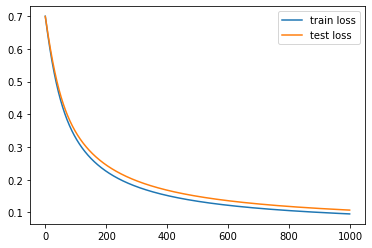

In [18]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [21]:
# Get accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = (p_train.numpy() > 0) # since we are no longer doing the sigmoid in the model we need to classify things using the previous values. Since the logistic function maps everything that is positive to 0.5 or more, we just need filter by all values greater than zero.
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = (p_test.numpy() > 0)
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9764, Test acc: 0.9734
